https://medium.com/techiepedia/binary-image-classifier-cnn-using-tensorflow-a3f5d6746697

In [1]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import shutil
import uuid

from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

In [19]:
# Function used to copy images from multiple directories into 1 direcotry
# meant to be used to copy images retrieved from the LAION-5B dataset to be used as training data for the classifier
def CopyDataFromToDirectories(source_directories, first_directory, second_directory, total_amount, percentage_img_first_dir):
    # Create the destination directories if they don't exist
    os.makedirs(first_directory, exist_ok=True)
    os.makedirs(second_directory, exist_ok=True)

    index = 0
    # Loop through the source directories
    for source_dir in source_directories:

        counter = 0

        # List files in the source directory
        files = os.listdir(source_dir)
        files = sorted(files, key=lambda x: int(x.split('.')[0]))

        # Loop through the files in the source directory
        for file in files:
            source_path = os.path.join(source_dir, file)

            if counter <= total_amount*percentage_img_first_dir:
                # Generate a unique filename to avoid overwriting existing files
                unique_filename = str(index) + '_' + file
                destination_path = os.path.join(first_directory, unique_filename)

                # Copy the file to the appropriate destination directory
                shutil.copy(source_path, destination_path)

            elif counter <= total_amount:
                # Generate a unique filename to avoid overwriting existing files
                unique_filename = str(index) + '_' + file
                destination_path = os.path.join(second_directory, unique_filename)

                # Copy the file to the appropriate destination directory
                shutil.copy(source_path, destination_path)

            else:
                break

            counter +=1

        index += 1

    print(f"Copied images to {first_directory}")
    print(f"Remaining images copied to {second_directory}")

In [20]:
# Source directories
src_directories = [
    "C:/Users/User/FYP/DownloadedImages/RealHumanBusinessMan",
    "C:/Users/User/FYP/DownloadedImages/RealHumanBusinessWoman",
    "C:/Users/User/FYP/DownloadedImages/RealHumanDoctorMan",
    "C:/Users/User/FYP/DownloadedImages/RealHumanDoctorWoman",
    "C:/Users/User/FYP/DownloadedImages/RealHumanWorkerMan",
    "C:/Users/User/FYP/DownloadedImages/RealHumanWorkerWoman",
]

# Destination directories
first_dir = "C:/Users/User/FYP/BinaryClassifierData/RealCartoonDataset/training_set/real/"
second_dir = "C:/Users/User/FYP/BinaryClassifierData/RealCartoonDataset/test_set/real/"

CopyDataFromToDirectories(source_directories=src_directories,
                          first_directory=first_dir,
                          second_directory=second_dir,
                          total_amount=1000,
                          percentage_img_first_dir=0.75)

Copied images to C:/Users/User/FYP/BinaryClassifierData/RealCartoonDataset/training_set/real/
Remaining images copied to C:/Users/User/FYP/BinaryClassifierData/RealCartoonDataset/test_set/real/


In [2]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("C:/Users/User/FYP/BinaryClassifierData/RealCartoonDataset/training_set/",target_size=(150,150),batch_size = 32,class_mode = 'binary')
                                         
test_dataset = test.flow_from_directory("C:/Users/User/FYP/BinaryClassifierData/RealCartoonDataset/test_set/",target_size=(150,150),batch_size = 32,class_mode = 'binary')

Found 6007 images belonging to 2 classes.
Found 1998 images belonging to 2 classes.


In [3]:
test_dataset.class_indices

{'cartoon': 0, 'real': 1}

In [4]:
model = keras.Sequential()

# Convolutional layer and maxpool layer 1
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 2
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 3
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 4
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# This layer flattens the resulting image array to 1D array
model.add(keras.layers.Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function 
model.add(keras.layers.Dense(512,activation='relu'))

# Output layer with single neuron which gives 0 for Cat or 1 for Dog 
# Here we use sigmoid activation function which makes our model output to lie between 0 and 1
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [5]:
# Compiling the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [6]:
#steps_per_epoch = train_imagesize/batch_size
#batch_size = 32
model.fit_generator(train_dataset,
         steps_per_epoch = 187,
         epochs = 10,
         validation_data = test_dataset)

C:\Users\User\AppData\Local\Temp\ipykernel_17352\2366260028.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_dataset,


Epoch 1/10
187/187 [==============================] - 88s 464ms/step - loss: 0.4583 - accuracy: 0.7819 - val_loss: 0.3877 - val_accuracy: 0.8268
Epoch 2/10
187/187 [==============================] - 70s 372ms/step - loss: 0.2849 - accuracy: 0.8780 - val_loss: 0.2618 - val_accuracy: 0.8869
Epoch 3/10
187/187 [==============================] - 69s 368ms/step - loss: 0.2123 - accuracy: 0.9153 - val_loss: 0.2518 - val_accuracy: 0.9044
Epoch 4/10
187/187 [==============================] - 67s 360ms/step - loss: 0.1606 - accuracy: 0.9356 - val_loss: 0.2173 - val_accuracy: 0.9199
Epoch 5/10
187/187 [==============================] - 66s 354ms/step - loss: 0.1329 - accuracy: 0.9451 - val_loss: 0.2173 - val_accuracy: 0.9124
Epoch 6/10
187/187 [==============================] - 67s 357ms/step - loss: 0.1106 - accuracy: 0.9572 - val_loss: 0.2504 - val_accuracy: 0.9149
Epoch 7/10
187/187 [==============================] - 68s 362ms/step - loss: 0.0845 - accuracy: 0.9687 - val_loss: 0.2507 - val_ac

In [7]:
model.save('TrainedModels/CartoonRealModel2.keras')  # Save the model to a file

In [3]:
# loaded_model = load_model('TrainedModels/CartoonRealModel.keras')

In [8]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    
    plt.imshow(img1)
 
    Y = image.img_to_array(img1)
    
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        
        plt.xlabel("Real",fontsize=30)
        
    
    elif val == 0:
        
        plt.xlabel("Cartoon",fontsize=30)

1/1 [==============================] - 0s 92ms/step
[[1.]]


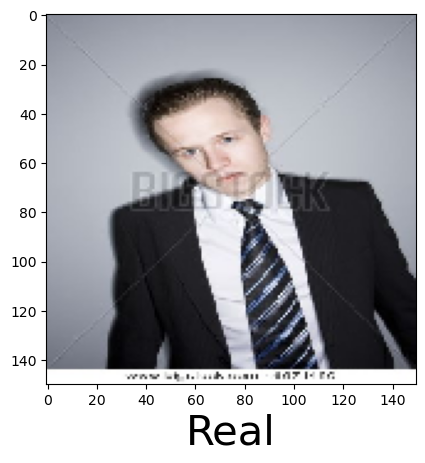

In [10]:
predictImage("C:/Users/User/FYP/BinaryClassifierData/RealCartoonDataset/training_set/real/0_151.jpg")

1/1 [==============================] - 0s 18ms/step
[[1.]]


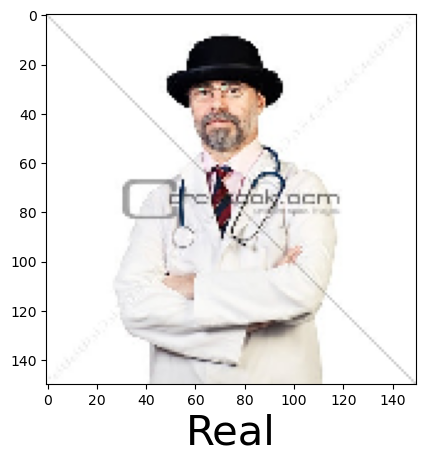

In [11]:
predictImage("C:/Users/User/FYP/DownloadedImages/RealHumanDoctor/1.jpg")

1/1 [==============================] - 0s 17ms/step
[[0.]]


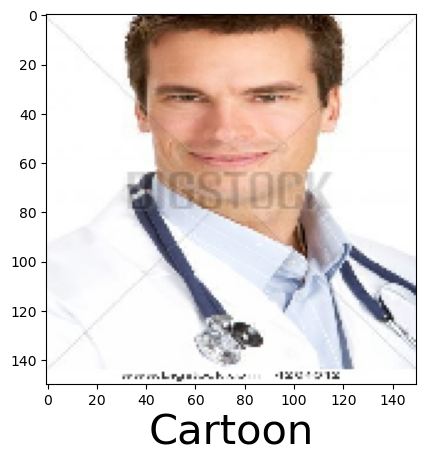

In [12]:
predictImage("C:/Users/User/FYP/DownloadedImages/RealHumanDoctor/2.jpg")

1/1 [==============================] - 0s 17ms/step
[[0.]]


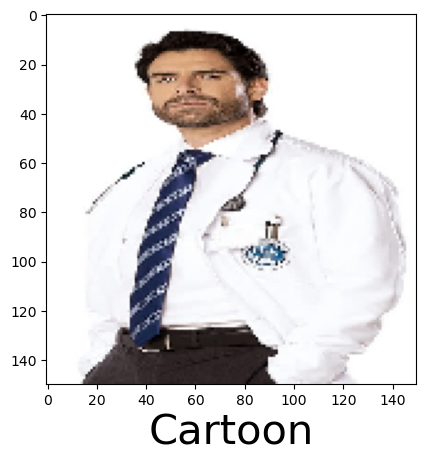

In [13]:
predictImage("C:/Users/User/FYP/DownloadedImages/RealHumanDoctor/3.jpg")

1/1 [==============================] - 0s 18ms/step
[[1.]]


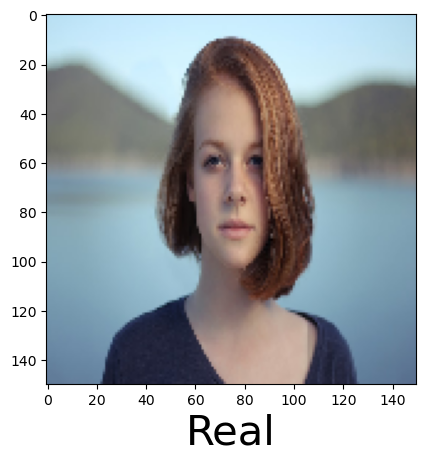

In [14]:
predictImage("C:/Users/User/FYP/photo-1438761681033-6461ffad8d80.jpeg")

1/1 [==============================] - 0s 17ms/step
[[0.]]


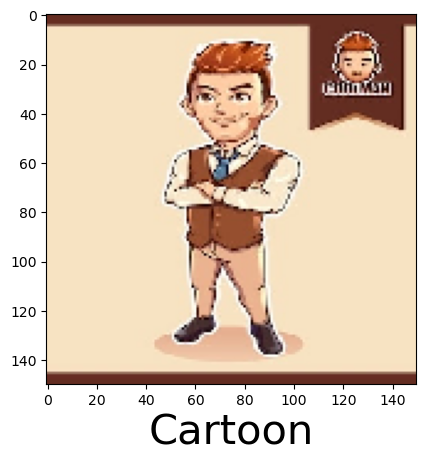

In [15]:
predictImage("C:/Users/User/FYP/BinaryClassifierData/RealCartoonDataset/test_set/cartoon/1502.jpg")

1/1 [==============================] - 0s 17ms/step
[[0.]]


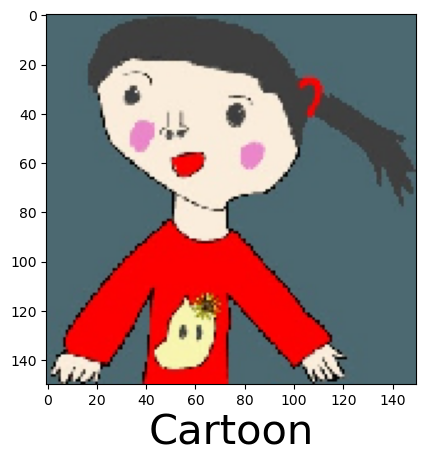

In [16]:
predictImage("C:/Users/User/FYP/BinaryClassifierData/RealCartoonDataset/test_set/cartoon/1503.jpg")

1/1 [==============================] - 0s 18ms/step
[[0.]]


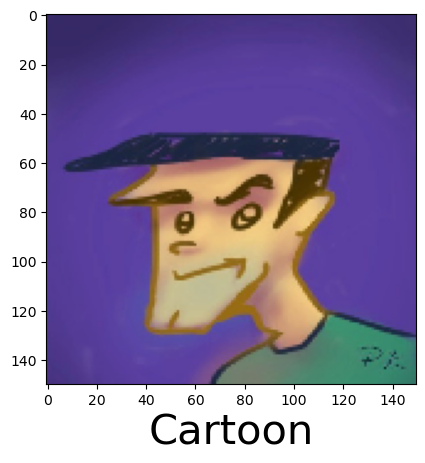

In [17]:
predictImage("C:/Users/User/FYP/BinaryClassifierData/RealCartoonDataset/test_set/cartoon/1504.jpg")